# Preparing Data
Prepare our data by adding location and converting age to integers.

In [3]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

In [4]:
data = pd.read_csv('data/desn_aguda.csv')
data

,cartodb_id,the_geom,departamento,municipio,edad,sexo,causa
0,146,0101000020E6100000E2B9EFFF40BC56C00DEB5B2020C7...,Quiché,Ixcán,8 meses,Niña,Asma bronquial / Neumonía
1,80,0101000020E6100000AC42FB3F24DF56C0C7A286C2A9E3...,Suchitepéquez,Santo Domingo Suchitepéquez,21 meses,Niño,Desequilibrio hidroeléctrolitico
2,43,0101000020E61000007622FBFF3CE856C08C0E0E1735BB...,Huehuetenango,Santa Bárbara,17 meses,Niña,Neumonía / Anemia
3,51,0101000020E6100000E2E402C0C6E956C053DF22C53A4E...,Huehuetenango,Concepción Huista,10 meses,Niño,Síndrome diarreico agudo
4,8,0101000020E6100000F19DFB1FDE5456C0230A77781941...,Zacapa,Gualán,24 meses,Niña,Neumonía
5,13,0101000020E6100000C0D600009B0257C00FA37B31EFAA...,Huehuetenango,Tectitán,34 meses,Niña,Neumonía
6,26,0101000020E6100000264003A0C0F156C09DEEE1372AF2...,San Marcos,San Pedro Sacatepéquez,29 meses,Niña,Enfermedad Diarreica Aguda
7,28,0101000020E6100000F5CFFCFFB29056C026BCCAFBB475...,Petén,Sayaxché,9 meses,Niño,Infección aguda en el oído
8,29,0101000020E6100000592E0200138B56C0D68C6F9CD262...,Petén,Sayaxché,2 meses,Niña,Síndrome diarreico agudo
9,6,0101000020E61000008E27FEFFEAC156C0F932EE5919B9...,Escuintla,Santa Lucía Cotzumalguapa,13 meses,Niño,Neumonía


In [5]:
data = data.iloc[:, 2:]
data.head()

,departamento,municipio,edad,sexo,causa
0,Quiché,Ixcán,8 meses,Niña,Asma bronquial / Neumonía
1,Suchitepéquez,Santo Domingo Suchitepéquez,21 meses,Niño,Desequilibrio hidroeléctrolitico
2,Huehuetenango,Santa Bárbara,17 meses,Niña,Neumonía / Anemia
3,Huehuetenango,Concepción Huista,10 meses,Niño,Síndrome diarreico agudo
4,Zacapa,Gualán,24 meses,Niña,Neumonía


Change age to a numerical value.

In [6]:
data['edad'] = data['edad'].str.extract('(\d+)')

Change value for gender to a more universal convection which is also easier to use as a conditional later.

In [7]:
data['sexo'] = np.where(data.sexo == 'Niña', 'f', data.sexo)
data['sexo'] = np.where(data.sexo == 'Niño', 'm', data.sexo)

In [8]:
data.head()

,departamento,municipio,edad,sexo,causa
0,Quiché,Ixcán,8,f,Asma bronquial / Neumonía
1,Suchitepéquez,Santo Domingo Suchitepéquez,21,m,Desequilibrio hidroeléctrolitico
2,Huehuetenango,Santa Bárbara,17,f,Neumonía / Anemia
3,Huehuetenango,Concepción Huista,10,m,Síndrome diarreico agudo
4,Zacapa,Gualán,24,f,Neumonía


In [9]:
data['edad'].mean()

5.6244590708424118e+242

To map the location we will actually need gps coordinates. Let's add a latitude and longitude to our dataframe and populate this by calling a geolocation service.

In [10]:
geolocator = Nominatim(timeout=3)

In [11]:
def get_coords():
    places = data["municipio"] + ", " + data["departamento"]
    lat, lon = [], []
    for idx, place in enumerate(places):
        loc = geolocator.geocode(place)
        lat.append(loc.latitude) 
        lon.append(loc.longitude)
        print(str(idx) + " " + place + ". [" + str(loc.latitude) + ", " + str(loc.longitude) + "]")
    dt = {"latitude": lat, "longitude": lon}
    df = pd.DataFrame(dt)
    return df

coords_df = get_coords()

0 Ixcán, Quiché. [15.9089263, -90.7857318]
1 Santo Domingo Suchitepéquez, Suchitepéquez. [14.2812826, -91.4967648666071]
2 Santa Bárbara, Huehuetenango. [15.32890025, -91.6260512587773]
3 Concepción Huista, Huehuetenango. [15.6888087, -91.6002543]
4 Gualán, Zacapa. [15.14937895, -89.3154697177837]
5 Tectitán, Huehuetenango. [15.36208135, -92.0266044926049]
6 San Pedro Sacatepéquez, San Marcos. [14.9675936, -91.7780422]
7 Sayaxché, Petén. [16.3387936, -90.1426225564746]
8 Sayaxché, Petén. [16.3387936, -90.1426225564746]
9 Santa Lucía Cotzumalguapa, Escuintla. [14.3002483, -91.0773325539357]
10 Siquinalá, Escuintla. [14.3301394, -90.9417629283235]
11 Puerto De San José, Escuintla. [13.92285215, -90.8229535181118]
12 Sololá, Sololá. [14.8181883, -91.1623301912574]
13 Cuilco, Huehuetenango. [15.4741002, -91.9660185398253]
14 Morales, Izabal. [15.4221006, -88.8096821981036]
15 Comitancillo, San Marcos. [15.10870285, -91.7368687695195]
16 San Rafael La Independencia, Huehuetenango. [15.7, -9

139 La Libertad, Huehuetenango. [15.637715, -91.8612232573073]
140 Santa María Chiquimula, Totonicapán. [15.0332842, -91.3238918442942]
141 Concepción Huista, Huehuetenango. [15.6888087, -91.6002543]
142 San Cristóbal Verapaz, Alta Verapaz. [15.38214, -90.5744795422918]
143 Genova, Quetzaltenango. [14.58411285, -91.8358617376837]
144 San Pedro Sacatepéquez, San Marcos. [14.9675936, -91.7780422]
145 San Juan Sacatepéquez, Guatemala. [14.7840421, -90.6582750436001]


In [12]:
coords_df.head()

,latitude,longitude
0,15.908926,-90.785732
1,14.281283,-91.496765
2,15.328900,-91.626051
3,15.688809,-91.600254
4,15.149379,-89.315470


Concatenate our new Data Frame with the main one to complete the data frame we'll use for analysis. 

In [13]:
df = data.join(coords_df)
df.head()

,departamento,municipio,edad,sexo,causa,latitude,longitude
0,Quiché,Ixcán,8,f,Asma bronquial / Neumonía,15.908926,-90.785732
1,Suchitepéquez,Santo Domingo Suchitepéquez,21,m,Desequilibrio hidroeléctrolitico,14.281283,-91.496765
2,Huehuetenango,Santa Bárbara,17,f,Neumonía / Anemia,15.328900,-91.626051
3,Huehuetenango,Concepción Huista,10,m,Síndrome diarreico agudo,15.688809,-91.600254
4,Zacapa,Gualán,24,f,Neumonía,15.149379,-89.315470


# Exploratory Data Analysis with Python

We'll be using the Pandas library. Make sure to install it with conda or pip and then we can import this in our file.

In [14]:
df.shape

(146, 7)

Get the fifth and sixth row.

In [15]:
df.iloc[5:7, :]

,departamento,municipio,edad,sexo,causa,latitude,longitude
5,Huehuetenango,Tectitán,34,f,Neumonía,15.362081,-92.026604
6,San Marcos,San Pedro Sacatepéquez,29,f,Enfermedad Diarreica Aguda,14.967594,-91.778042


We can also use labels to retrive data.

In [16]:
df.loc[:5, ["edad", "causa"]]

,edad,causa
0,8,Asma bronquial / Neumonía
1,21,Desequilibrio hidroeléctrolitico
2,17,Neumonía / Anemia
3,10,Síndrome diarreico agudo
4,24,Neumonía
5,34,Neumonía


We can also retrieve a column by passing it as an index, retrieving multiple columns implies we use a list. When one column is retrieved this is a Pandas Series object type.  

In [17]:
df["causa"].head()

0           Asma bronquial / Neumonía
1    Desequilibrio hidroeléctrolitico
2                   Neumonía / Anemia
3            Síndrome diarreico agudo
4                            Neumonía
Name: causa, dtype: object

In [18]:
df[["latitude", "longitude"]].head()

,latitude,longitude
0,15.908926,-90.785732
1,14.281283,-91.496765
2,15.328900,-91.626051
3,15.688809,-91.600254
4,15.149379,-89.315470


We can also build a series object manually as folllows:

In [19]:
s1 = pd.Series(["first value", "second value"])
s1

0     first value
1    second value
dtype: object

In [20]:
s2 = pd.Series([101, 253])
s2

0    101
1    253
dtype: int64

In [21]:
df2 = pd.DataFrame([s1, s2])
df2

,0,1
0,first value,second value
1,101,253


We can also build it as a list of lists and add column and row names to this.

In [22]:
d3 = pd.DataFrame(
    [
        [345, "A value"],
        [678, "B value"],
        [890, "C value"]
    ],
    index=["row1", "row2", "row3"],
    columns=["col1", "col2"]
)
d3

,col1,col2
row1,345,A value
row2,678,B value
row3,890,C value


Now we can use the same indexing functions as with other dataframes.

In [23]:
d3.loc["row1":"row2", "col2"]

row1    A value
row2    B value
Name: col2, dtype: object

We can use some df functions in Series such as mean. This function will take the mean of numerical values by default, we don't have to escape strings.

In [24]:
# Mean of the complete df
df.mean()

latitude     15.086967
longitude   -90.889470
dtype: float64

In [25]:
df["edad"].mean()

5.6244590708424118e+242

In [26]:
df.mean(axis=1).head()

0   -37.438403
1   -38.607741
2   -38.148576
3   -37.955723
4   -37.083045
dtype: float64

The above changes the axis of the mean function and it only affects rows. There are also more functions we can use:

In [27]:
# Find correlation between columns
df.corr()

,latitude,longitude
latitude,1.00000,0.12598
longitude,0.12598,1.00000


In [28]:
# Count number of non-null values in each column
df.count()

departamento    146
municipio       146
edad            146
sexo            146
causa           146
latitude        146
longitude       146
dtype: int64

In [29]:
# Highest value in each column
df.max()

departamento      Zacapa
municipio         Zacapa
edad                   9
sexo                   m
causa           Varicela
latitude         17.1643
longitude       -88.8097
dtype: object

In [30]:
# Lowest value in each column
df.min()

departamento    Alta Verapaz
municipio          Aguacatán
edad                       1
sexo                       f
causa                 Anemia
latitude             13.9229
longitude           -92.1457
dtype: object

In [31]:
# Median of each column
df.median()

latitude     15.038968
longitude   -91.025596
dtype: float64

In [32]:
# Standard deviation of each column
df.std()

latitude     0.554405
longitude    0.896452
dtype: float64

In [34]:
# Filtering
# 1. Store a Series of booleans based on a condition
loc = (df["longitude"] > -91) & (df["sexo"] == "f")
loc

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21      True
22      True
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
116    False
117    False
118    False
119     True
120    False
121     True
122    False
123    False
124     True
125    False
126    False
127     True
128    False
129    False
130     True
131    False
132    False
133     True
134    False
135     True
136    False
137     True
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145     True
Length: 146, dtype: bool

In [35]:
# 2. Select the rows from the dataframe based on the boolean Series
filtered_df = df[loc]
filtered_df

,departamento,municipio,edad,sexo,causa,latitude,longitude
0,Quiché,Ixcán,8,f,Asma bronquial / Neumonía,15.908926,-90.785732
4,Zacapa,Gualán,24,f,Neumonía,15.149379,-89.315470
8,Petén,Sayaxché,2,f,Síndrome diarreico agudo,16.338794,-90.142623
19,Chiquimula,Esquipulas,10,f,Falla multiorganica,14.630887,-89.255256
21,Escuintla,Palín,15,f,Anemia,14.390007,-90.718289
22,Santa Rosa,Taxisco,21,f,Neumonía,14.033049,-90.530288
29,Chimaltenango,Chimaltenango,8,f,Anemia,14.684519,-90.807782
33,Guatemala,Mixco,12,f,No existe registro,14.656118,-90.598703
37,Jalapa,San Pedro Pinula,4,f,Invaginación intestinal,14.714889,-89.839111
38,Jalapa,San Pedro Pinula,32,f,Síndrome diarreico agudo,14.714889,-89.839111


Now we can plot with pandas plotting tool which uses matplotlib

In [36]:
%matplotlib inline

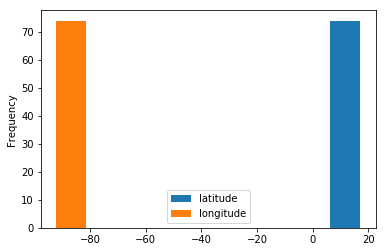

In [37]:
df[df["sexo"] == "f"].plot(kind="hist")

As we can see we successfully plotted but the graph is not useful because it makes no sense to plot gps coordinates this way. So let's add plotly to the mix and mapbox to render our data in a more appropriate chart.

In [38]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot

init_notebook_mode(connected=True)

#mapbox_access_token = '<mapbox-token>'

In [39]:
data = [
    go.Scattermapbox(
        lat=df['latitude'],
        lon=df['longitude'],
        mode='markers',
        marker=dict(
            size=9
        )
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=15.6356088,
            lon=-89.8988087
        ),
        pitch=0,
        zoom=6
    ),
)

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)